In [5]:
stage3_dataset = 'therealvul/parlertts_pony_speech_tagged_stage3'

from datasets import load_dataset
dataset = load_dataset(stage3_dataset, split='train')

freq_table = dict()
count_table = dict()

def gender_fixer(example):
    if not (example['speaker']) in freq_table:
        freq_table[example['speaker']] = 0
        count_table[example['speaker']] = 0
        
    count_table[example['speaker']] += 1
    if example['gender'] == 'male':
        if ' her ' in example['text_description']:
            freq_table[example['speaker']] += 1
            #print(f'Gender error for {example["speaker"]}: '
            #    f'{example["text_description"]}')
        example['text_description'] = example['text_description'].replace(
            ' her ', ' his ')
    elif example['gender'] == 'female':
        if ' his ' in example['text_description']:
            freq_table[example['speaker']] += 1
            #print(f'Gender error for {example["speaker"]}: '
            #    f'{example["text_description"]}')
        example['text_description'] = example['text_description'].replace(
            ' his ', ' her ')
    return example

updated_dataset = dataset.map(gender_fixer)

Map:   0%|          | 0/64780 [00:00<?, ? examples/s]

In [12]:
updated_dataset.push_to_hub(stage3_dataset)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/65 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/therealvul/parlertts_pony_speech_tagged_stage3/commit/45508d39d19195222b9c184288dd768a0ff83bf0', commit_message='Upload dataset', commit_description='', oid='45508d39d19195222b9c184288dd768a0ff83bf0', pr_url=None, pr_revision=None, pr_num=None)

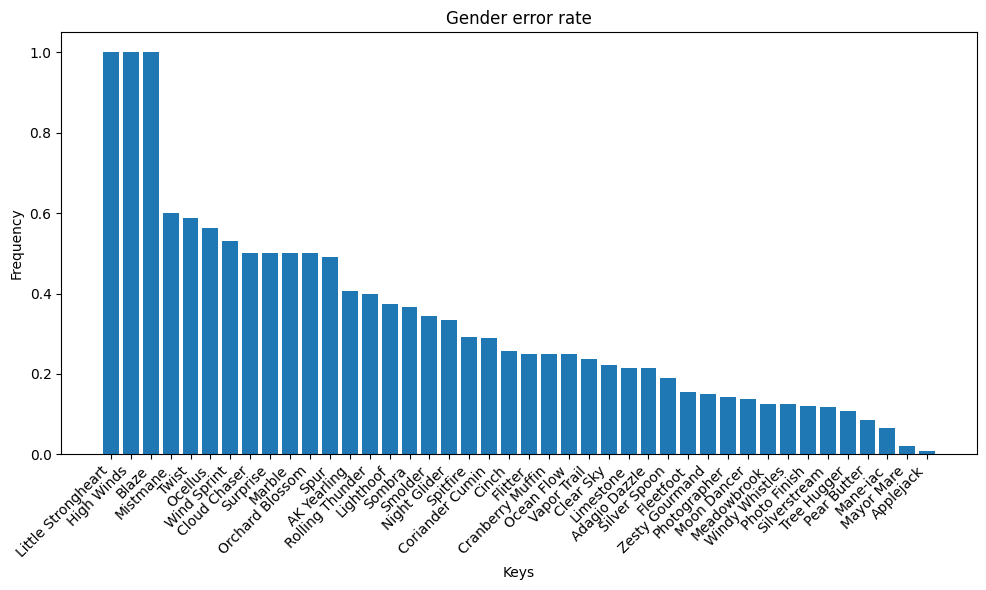

In [11]:
import matplotlib.pyplot as plt

freq_dict = {
    speaker: freq_table[speaker]/count_table[speaker] 
    for speaker, freq in freq_table.items()
}

def plot_nonzero_rates(freq_dict):
    # Filter out zero values
    nonzero_dict = {k: v for k, v in freq_dict.items() if v != 0}
    
      # Sort the dictionary by values in descending order
    sorted_dict = dict(sorted(nonzero_dict.items(), key=lambda item: item[1], reverse=True))
    
    # Create lists for keys and values
    keys = list(sorted_dict.keys())
    values = list(sorted_dict.values())
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(keys, values)
    
    # Customize the chart
    plt.title('Gender error rate')
    plt.xlabel('Keys')
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels if there are many keys
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
plot_nonzero_rates(freq_dict)